In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("product_sales.csv")

In [36]:
# Drop random columns
df = df.drop(columns=["Unnamed: 107", "94"])
# Melt data and remove strings for week names
df = df.melt(id_vars=["Scode", "Pcode", "Price"], var_name="Week", value_name="Quantity Sold")
df["Week"] = df["Week"].str.extract('(\d+)').astype(int)


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/var/folders/hh/rn_fsj015zz6cmlmssx4w0y00000gn/T/ipykernel_32535/4238326872.py:5: SyntaxWarning: invalid escape sequence '\d'
  df["Week"] = df["Week"].str.extract('(\d+)').astype(int)


In [37]:
# Also want to sum over the quantities for that week to aggregate
df[(df["Pcode"] == "SKU1") & (df["Scode"] == "Store1")]

,Scode,Pcode,Price,Week,Quantity Sold
0,Store1,SKU1,$24.00,0,23
6000,Store1,SKU1,$24.00,1,48
12000,Store1,SKU1,$24.00,2,47
18000,Store1,SKU1,$24.00,3,42
24000,Store1,SKU1,$24.00,4,22
...,...,...,...,...,...
594000,Store1,SKU1,$24.00,99,133
600000,Store1,SKU1,$24.00,100,229
606000,Store1,SKU1,$24.00,101,381
612000,Store1,SKU1,$24.00,102,21


In [47]:
graphing_df = df[(df["Pcode"] == "SKU1") & (df["Scode"] == "Store1")].reset_index(drop=True)

In [48]:
graphing_df

,Scode,Pcode,Price,Week,Quantity Sold
0,Store1,SKU1,$24.00,0,23
1,Store1,SKU1,$24.00,1,48
2,Store1,SKU1,$24.00,2,47
3,Store1,SKU1,$24.00,3,42
4,Store1,SKU1,$24.00,4,22
...,...,...,...,...,...
99,Store1,SKU1,$24.00,99,133
100,Store1,SKU1,$24.00,100,229
101,Store1,SKU1,$24.00,101,381
102,Store1,SKU1,$24.00,102,21


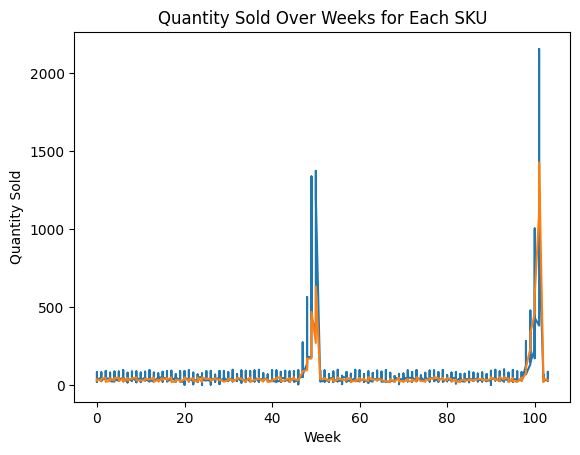

In [18]:
skus = df["Pcode"].unique()
plt.figure()
skus = ["SKU1","SKU1142"]
for sku in skus:
    sku_data = df[df["Pcode"] == sku]
    plt.plot(sku_data["Week"], sku_data["Quantity Sold"])
plt.title("Quantity Sold Over Weeks for Each SKU")
plt.xlabel("Week")
plt.ylabel("Quantity Sold")
plt.show()
